<a href="https://colab.research.google.com/github/estellasouza/Credit_Card_Default/blob/main/MVP_CreditAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Analysis MVP**

**Estella Barbosa de Souza**

September, 2024

# 1) Problem definition and set up

## 1.1) Problem description

One critical consideration that banks have to address everyday is the credibility of their clients when offering credit card limits, loans, etc. This requires a clear understanding of the clients' historic payments and current financials, developing a model of what a good payer looks like in financial terms.

In this particular problem, we want to predict if we should expect a client to default or not in next month's credit card bill. The problem and data set was designed as a supervised learning problem, having a binary target that specifies is that client will default or not in the payment. Note that given the binary nature of the dataset, we can build a classification model. However, another option would be to model the probability of default to enable refined analysis for special cases as need arises.

## 1.2) Initial hypotheses

An initial qualitative analysis would suggest that we should expect to find evidence for the following:

* Spending closer to the credit card limit increases chances of default
* Clients that have already defaulted previous months payments are more likely to default again, especially with snowball effects that interest rates can bring




## 1.3) Data selection and loading

The data selected provides a historic overview of clients credit card bills, when it was payed (on time or delayed), and the amount of the bill. Furthermore, it provided some demographic information about the client.
The data is from a bank in Taiwan, and therefore all currency displayed is in NT dollars (New Taiwan dollars).

This data set was selected due to the variety of features and the abundance of instances available, which will facilitate the training of the model.

The data set discussed is available in the UCI Machine Learning Repository.

### Importing needed libraries

In [82]:
# Configure to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For data preparation: scaling & encoding
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import  LabelEncoder

### Load data

In [83]:
# Loading data from github repository

# url with location of data
url = "https://raw.githubusercontent.com/estellasouza/Credit_Card_Default/refs/heads/main/UCI_default_credit_card_data.csv"


# Reading CSV file
dataset = pd.read_csv(url, encoding='unicode_escape')

# Printing first 5 lines to verify the attributes
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Defining the attributes

As described in the data source, the atributes are as follows (see following analysis to understand the difference seen in some attributes):

* ID: non-identifying client ID (integer)
* LIMIT_BAL (to be changed to CREDIT): amount of given credit, considering the individual and their family's consumer credit in NT dollars (float)
* SEX: Gender -> 1 = male, 2 = female (categorical)
* EDUCATION: highest education level of the client -> 1 = graduate school, 2 = university, 3 = high school, 4 = others (categorical)
* MARRIAGE: Marital status of the client -> 1 = married, 2 = single, 3 = others (categorical)
* AGE: years (integer)
* PAY_1: repayment status in Sep 2005 -> -1 = pay duly, 1 = delayed 1 month, 2 = delayed 2 months, 3 = delayed 3 months, etc. (categorical)
* PAY_2: repayment status in Aug 2005 -> -1 = pay duly, 1 = delayed 1 month, 2 = delayed 2 months, 3 = delayed 3 months, etc. (categorical)
* PAY_3: repayment status in Jul 2005 -> -1 = pay duly, 1 = delayed 1 month, 2 = delayed 2 months, 3 = delayed 3 months, etc. (categorical)
* PAY_4: repayment status in Jun 2005 -> -1 = pay duly, 1 = delayed 1 month, 2 = delayed 2 months, 3 = delayed 3 months, etc. (categorical)
* PAY_5: repayment status in May 2005 -> -1 = pay duly, 1 = delayed 1 month, 2 = delayed 2 months, 3 = delayed 3 months, etc. (categorical)
* PAY_6: repayment status in Apr 2005 -> -1 = pay duly, 1 = delayed 1 month, 2 = delayed 2 months, 3 = delayed 3 months, etc. (categorical)
* BILL_AMT1 (NT dollars): amount of bill statement in Sep 2005 (float)
* BILL_AMT2 (NT dollars): amount of bill statement in Aug 2005 (float)
* BILL_AMT3 (NT dollars): amount of bill statement in Jul 2005 (float)
* BILL_AMT4 (NT dollars): amount of bill statement in Jun 2005 (float)
* BILL_AMT5 (NT dollars): amount of bill statement in May 2005 (float)
* BILL_AMT6 (NT dollars): amount of bill statement in Apr 2005 (float)
* PAY_AMT1 (NT dollars): amount paid in Sep 2005 (float)
* PAY_AMT2 (NT dollars): amount paid in Aug 2005 (float)
* PAY_AMT3 (NT dollars): amount paid in Jul 2005 (float)
* PAY_AMT4 (NT dollars): amount paid in Jun 2005 (float)
* PAY_AMT5 (NT dollars): amount paid in May 2005 (float)
* PAY_AMT6 (NT dollars): amount paid in Apr 2005 (float)
* TARGET (binary): if client will default on payment or not -> Yes = 1, No = 0

Nonetheless, as we will see below when looking at all the features available, we can already identify some inconsistencies in the data labels.

#2) Data Analysis & Pre-processing

As mentioned above, we observe a few inconsistencies with the description provided in the data set documentation and the data loaded in the dataframe:
* The credit amount, the bill amount, and the payment amount variables were given as integers
* The repayment status caregory PAY_1 is listed in the data set as PAY_0: we will change that to have the same logic of the other variables
* The TARGET is named ```default payment next month```, which will be changed to simplify the coding

Besides that, we don't find any missing value in all 25 columns (all with 3000 instances).

In [84]:
# Printing the information of each variable in the data frame
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [85]:
# Modifying the names of the troubling columns
dataset.rename(columns={'default payment next month':'TARGET'}, inplace=True)
dataset.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

# Modifying the name of the credit variable for simplicity:
dataset.rename(columns={'LIMIT_BAL':'CREDIT'}, inplace=True)

# Modifying the data type of the credit, bill amount, and payment amount variables to the correct representation of floats
columns_change = ['CREDIT','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
dataset[columns_change] = dataset[columns_change].astype(np.float64)

In [86]:
# Looking at the first few lines to check the result of the changes
dataset.head()

,ID,CREDIT,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TARGET
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [87]:
# Printing the dimensions of the dataset
print("###### Dimensions ######")
print("Instances: ",dataset.shape[0])
print("Features: ",dataset.shape[1]-1) #removing the target column
print('Target: 1')

###### Dimensions ######
Instances:  30000
Features:  24
Target: 1


Now we can start by looking at some basic statistics of the data set.

In [88]:
# Listing basis statistics of the columns in the data set
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
CREDIT,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


A few points that we can highlight by looking at the values above:
* The TARGET variable is not balenced, as a balance would indicate a mean close to 0.5 (given that it is a binary variable), but it is closer to 0.22, indicating that ~22% of the instances are actually value 1 (yes - they will default in the following month). It is important to keep that in mind when dividing the data set in training and testing sets.
* The variables with the bill amount (BILL_AMT1, BILL_AMT2, etc.) have negative minimun values, which brings to question the accuracy of these entries, given that theoretically we do not expect to have negative bills. Further investigation of such entries will need to be done.
* The mean payment amount is considerably smaller than the mean bill amount.
* Although only 4 categories were described in the data source for the EDUCATION variable, here we see that the range of the numerical label is between 0 to 6. This indicates that we don't know what information some of these categories represent.

Although we could also look at the mode and median of the variables, it is not necessary at this point, since we will follow with the visualization of the variables to identify the frequency and median of the distributions as needed.

## 2.1) Data visualization

Depending of the type of variable we are dealing with, we can visualize the data in different ways.

First, let's look at the categorical variables:
* Sex
* Education
* Marriage
* Pay status (PAY_1, PAY_2, etc.)

Male (1): 11888 (39.6%)
Female (2): 18112 (60.4%)


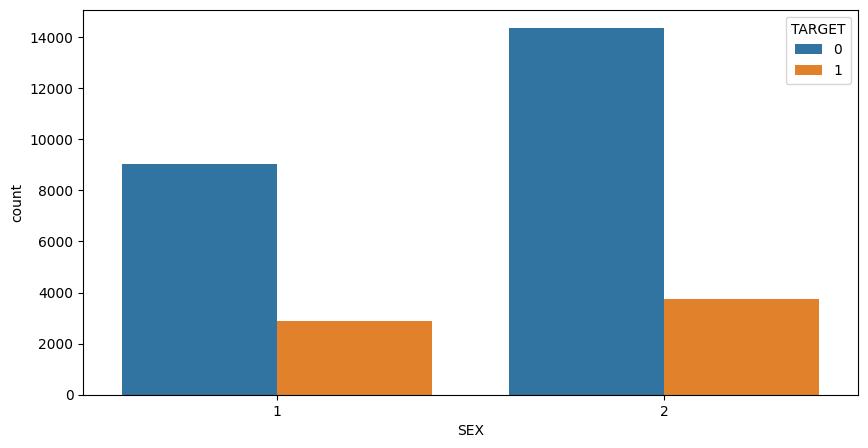

In [89]:
#SEX
# Plotting the distribution of values

# Set figure
fig = plt.figure(figsize=(10,5))

# Plot category
sns.countplot(data=dataset, x="SEX", palette="tab10", hue='TARGET')

# Print information of the frequency of categories and share of instances in that category
print("Male (1): %i (%.1f%%)" % (dataset.groupby('SEX').count()['ID'].iloc[0], 100*dataset.groupby('SEX').count()['ID'].iloc[0]/dataset['ID'].count()))
print("Female (2): %i (%.1f%%)" % (dataset.groupby('SEX').count()['ID'].iloc[1], 100*dataset.groupby('SEX').count()['ID'].iloc[1]/dataset['ID'].count()))

As we can observe, men are more likely to default on payment. Let's calculate the proportions.

In [90]:
# Dataframe with TARGET=1 (default category)
df_default = dataset[dataset['TARGET']==1]

# Calculating share of male clients defaulting
m_default = df_default.groupby('SEX')['ID'].count().loc[1] # male clients defaulting
m_total = dataset.groupby('SEX')['ID'].count().loc[1] # total number of male clients

# Calculating share of female clients defaulting
f_default = df_default.groupby('SEX')['ID'].count().loc[2] # female clients defaulting
f_total = dataset.groupby('SEX')['ID'].count().loc[2] # total number of female clients

print("%% of male clients defaulting next month: %0.2f%%" % (100*m_default/m_total))
print("%% of female clients defaulting next month: %0.2f%%" % (100*f_default/f_total))


% of male clients defaulting next month: 24.17%
% of female clients defaulting next month: 20.78%


The base of the bank's clients is skewed towards women (60% of the data set). We can also see that a higher share of men are defaulting than the women.

Graduate School (1): 10585 (35.3%)
University (2): 14030 (46.8%)
High School (3): 4917 (16.4%)
Other (4): 123 (0.4%)


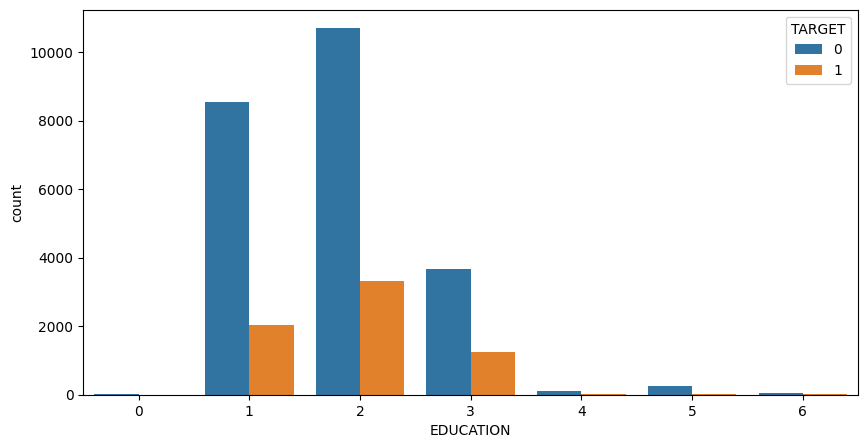

In [91]:
# EDUCATION
# Plotting the distribution of values

# Set figure
fig = plt.figure(figsize=(10,5))

# Plot category
sns.countplot(data=dataset, x="EDUCATION", palette="tab10", hue='TARGET')

# Print information of the frequency of categories and share of instances in that category
print("Graduate School (1): %i (%.1f%%)" % (dataset.groupby('EDUCATION').count()['ID'].loc[1], 100*dataset.groupby('EDUCATION').count()['ID'].loc[1]/dataset['ID'].count()))
print("University (2): %i (%.1f%%)" % (dataset.groupby('EDUCATION').count()['ID'].loc[2], 100*dataset.groupby('EDUCATION').count()['ID'].loc[2]/dataset['ID'].count()))
print("High School (3): %i (%.1f%%)" % (dataset.groupby('EDUCATION').count()['ID'].loc[3], 100*dataset.groupby('EDUCATION').count()['ID'].loc[3]/dataset['ID'].count()))
print("Other (4): %i (%.1f%%)" % (dataset.groupby('EDUCATION').count()['ID'].loc[4], 100*dataset.groupby('EDUCATION').count()['ID'].loc[4]/dataset['ID'].count()))

As we can see from the distribution of the education category, the values that were not described in the data source (0, 5, 6), represent small share of the total data set. We can proceed in two was:
* remove the instances where the education category has any of these values
* consider them all under the "other" category (number 4)

In [92]:
# Calculating share of clients defaulting for each education level
edu_default = []
edu_total = []
edu_levels = [1,2,3,4] # 1=Graduate School, 2=University, 3=High School, 4=Other (ignoring the ones that we have no information about)
for i in range(len(edu_levels)):
  edu_default.append(df_default.groupby('EDUCATION')['ID'].count().loc[edu_levels[i]]) # clients defaulting
  edu_total.append(dataset.groupby('EDUCATION')['ID'].count().loc[edu_levels[i]]) # total number of clients in category
  print("%% of clients %i defaulting next month: %0.2f%%" % (edu_levels[i], 100*edu_default[-1]/edu_total[-1]))


% of clients 1 defaulting next month: 19.23%
% of clients 2 defaulting next month: 23.73%
% of clients 3 defaulting next month: 25.16%
% of clients 4 defaulting next month: 5.69%


We can observe based of this analysis that most of the clients have some sort of higher degree (graduate or university degrees) and that they are less likely to default as the ones without higher degrees.

Married (1): 13659 (45.5%)
Single(2): 15964 (53.2%)
Other (3): 323 (1.1%)


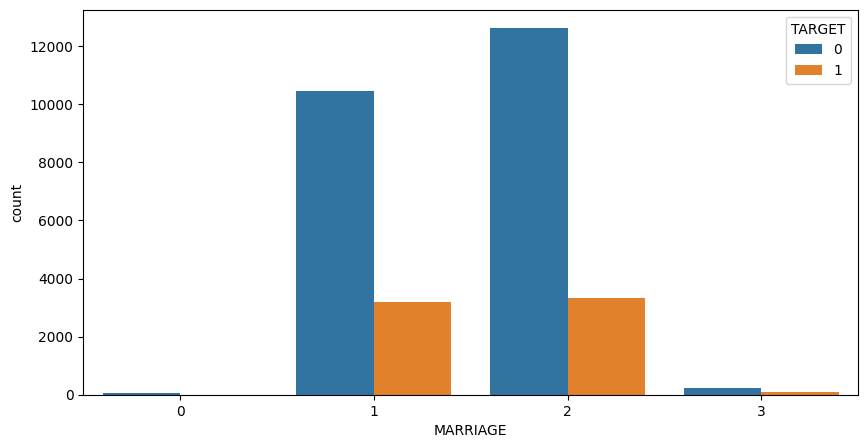

In [93]:
# MARRIAGE
# Plotting the distribution of values

# Set figure
fig = plt.figure(figsize=(10,5))

# Plot category
sns.countplot(data=dataset, x="MARRIAGE", palette="tab10", hue='TARGET')

# Print information of the frequency of categories and share of instances in that category
print("Married (1): %i (%.1f%%)" % (dataset.groupby('MARRIAGE').count()['ID'].loc[1], 100*dataset.groupby('MARRIAGE').count()['ID'].loc[1]/dataset['ID'].count()))
print("Single(2): %i (%.1f%%)" % (dataset.groupby('MARRIAGE').count()['ID'].loc[2], 100*dataset.groupby('MARRIAGE').count()['ID'].loc[2]/dataset['ID'].count()))
print("Other (3): %i (%.1f%%)" % (dataset.groupby('MARRIAGE').count()['ID'].loc[3], 100*dataset.groupby('MARRIAGE').count()['ID'].loc[3]/dataset['ID'].count()))

In [94]:
# Calculating share of clients defaulting for each marriage status
mar_default = []
mar_total = []
mar_levels = [1,2,3,] # 1=Married, 2=Single, 3=Other (0 was not described in the data source)
for i in range(len(mar_levels)):
  mar_default.append(df_default.groupby('MARRIAGE')['ID'].count().loc[mar_levels[i]]) # clients defaulting
  mar_total.append(dataset.groupby('MARRIAGE')['ID'].count().loc[mar_levels[i]]) # total number of clients in category
  print("%% of clients %i defaulting next month: %0.2f%%" % (mar_levels[i], 100*mar_default[-1]/mar_total[-1]))

% of clients 1 defaulting next month: 23.47%
% of clients 2 defaulting next month: 20.93%
% of clients 3 defaulting next month: 26.01%


The share between married and single people is close to being balanced, which will facilitate any pre-processing needed later on.

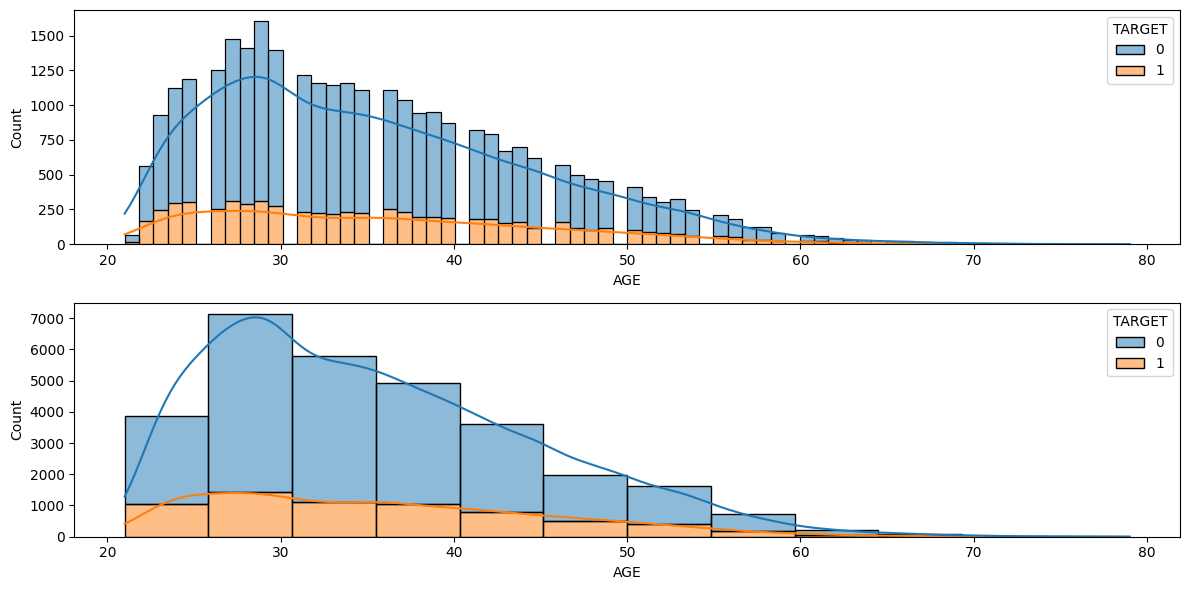

In [95]:
# AGE

# Set up figure and subplots
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(12,6), dpi=100)

# Plotting
sns.histplot(data=dataset, x='AGE', hue='TARGET', kde=True, multiple='stack', ax=axs[0])
sns.histplot(data=dataset, x='AGE', hue='TARGET', kde=True, multiple='stack', binwidth=5, ax=axs[1]) # Changing bin sizes based on natural separation between clusters
plt.tight_layout()

We can observe that the distributions peak at lower ages (<30 year) and has a long tail towards older clients. This would mean that we would likely have to standardize this feature if we find it to be important to determine the default likelihood. Another option would be to consider interval ranges and treat this feature as a categorical one. First, let's try to get a better understanding of the impact of this feature in the Target classification.

In [96]:
# Grouping by age and creating view of number of clients of each age and target class
df_age = dataset.groupby(['AGE'])['TARGET'].value_counts().reset_index()

# Age intervals
age_interval = [20, 30, 40, 50, 60, 70, 80] # edge values of the bin
names = ['21-30','31-40','41-50','51-60','61-70','71-80']

df_age['AGE_BIN'] = pd.cut(x=df_age['AGE'], bins=age_interval, labels=names, right=True)
df_age.head()

,AGE,TARGET,count,AGE_BIN
0,21,0,53,21-30
1,21,1,14,21-30
2,22,0,391,21-30
3,22,1,169,21-30
4,23,0,684,21-30


<Axes: xlabel='AGE_BIN', ylabel='count'>

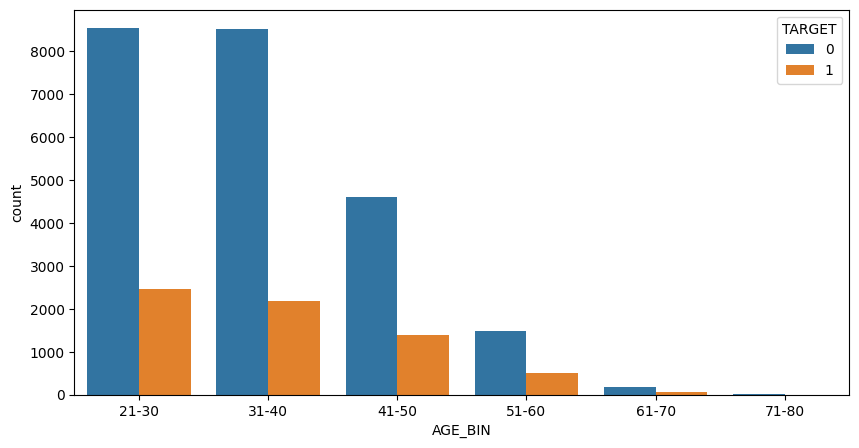

In [97]:
# Set figure
fig = plt.figure(figsize=(10,5))

# Plot category
sns.barplot(data=df_age, x="AGE_BIN", y='count', palette="tab10", hue='TARGET', estimator='sum', errorbar=None)

As we already mentioned, the distribution is skewed to lower ages (between 21 and 40 years of age). Let's get the % of clients that will default in payment for each range.

In [98]:
# Calculating share of clients defaulting for each age range
# New view
df_age_default = pd.DataFrame() # create dataframe
df_age_default= df_age[df_age['TARGET']==1].groupby('AGE_BIN')['count'].sum().reset_index() # Get the count of clients that will default for each age group
df_age_default['total'] = df_age.groupby('AGE_BIN')['count'].sum().reset_index()['count'] # Get the total number of clients in each age group
df_age_default['share'] = 100*df_age_default['count']/df_age_default['total'] # calculate % of the total number in each group that will default
df_age_default.head()

,AGE_BIN,count,total,share
0,21-30,2471,11013,22.437120
1,31-40,2189,10713,20.433119
2,41-50,1399,6005,23.297252
3,51-60,504,1997,25.237857
4,61-70,68,257,26.459144


Although the % of defaulters in later ages is greater, the total contribution of those clients to the data set is smaller. Within 10 to 50 years old, the share of defaulters in each group is somewhat similar, indicating that age might not be a very important feature in the overall modeling. Further investigation below will indicate if that is true.

Now, let's investigate the credit each client has.

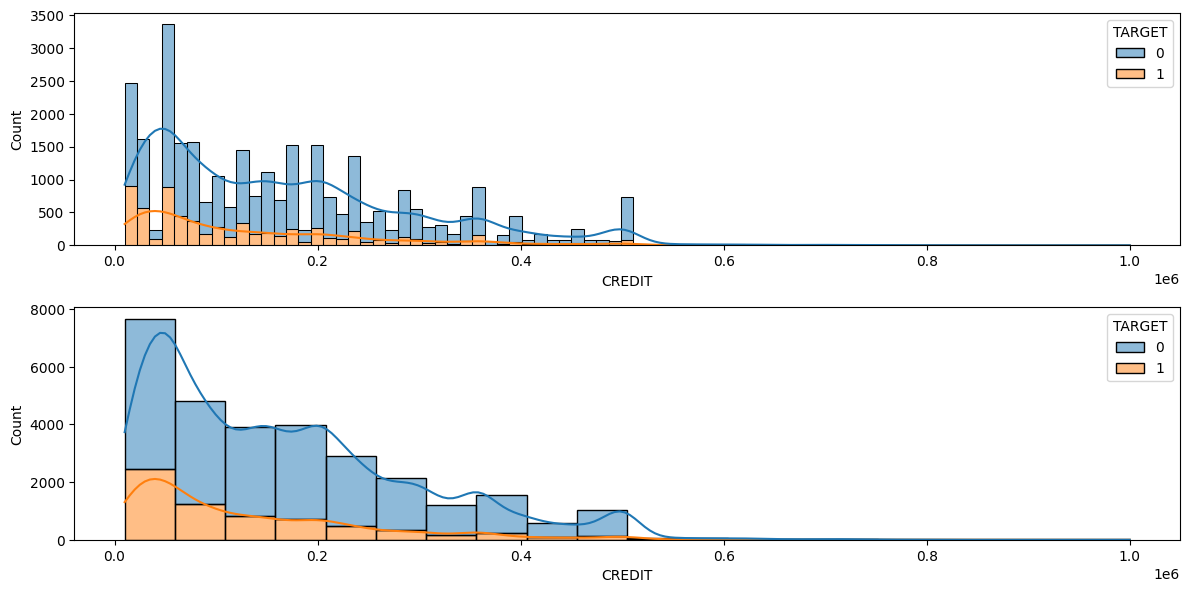

In [99]:
# CREDIT

# Set up figure and subplots
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(12,6), dpi=100)

# Plotting
sns.histplot(data=dataset, x='CREDIT', hue='TARGET', kde=True, multiple='stack', ax=axs[0])
sns.histplot(data=dataset, x='CREDIT', hue='TARGET', kde=True, multiple='stack', binwidth=50000, ax=axs[1]) # Changing bin sizes based on natural separation between clusters
plt.tight_layout()

The unit of CREDIT in the plots above is NT dollars (New Taiwan dollars), and the x axis shows a scalling of 1 million (since credit lines go up to 1 million NT dollars.

One clear observation we can make from the overall distribution of CREDIT is that the range is large and it is highly skwed, so if we consider such variable in the model, it will need to pass some form of data treatment, such as standardization, so that we can correct for outliers.

<Axes: >

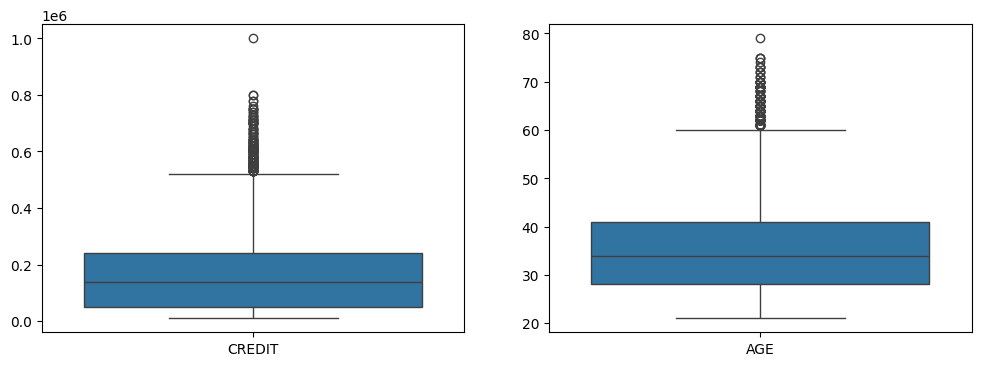

In [100]:
# Boxplot of the CREDIT and AGE variables for comparison of tails and outliers

# Set up figure and subplots
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(12,4), dpi=100)

sns.boxplot(data=dataset[['CREDIT']], ax=axs[0])
sns.boxplot(data=dataset[['AGE']], ax=axs[1])

We should be careful when dealing with these features, since it is likely highly correlated with other features in the data set. Therefore, let's compare all the features together with Seaborn's pair plot.

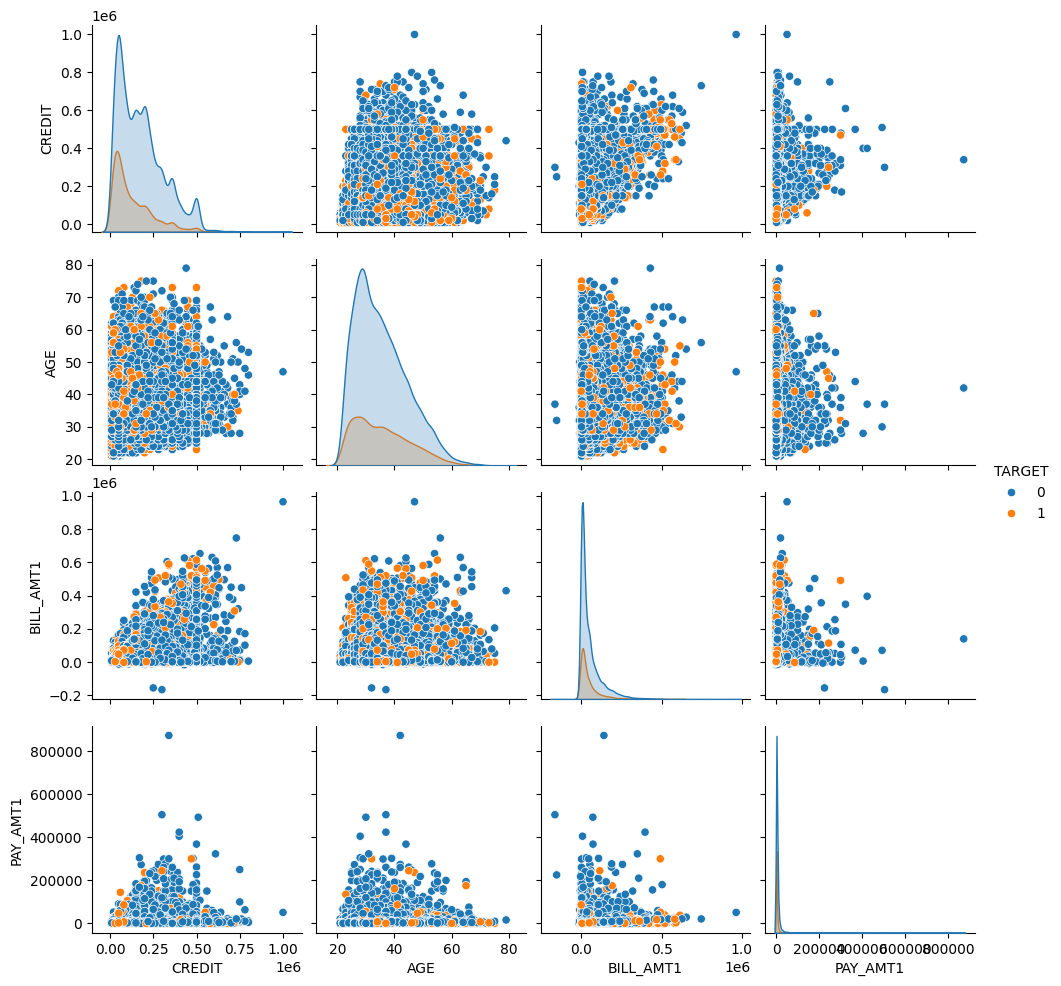

In [101]:
# Define features we want to consider in the plot
features = ['TARGET', 'CREDIT', 'AGE', 'BILL_AMT1', 'PAY_AMT1'] # Choosing only the latest month to understand the comparison to other variables.

# Plotting the numeric features in comparison
sns.pairplot(data=dataset[features], hue='TARGET')

With this comparison we can see that there is no clear pattern that can help up easily segment the clients among good or bad payers and predict their default next month. This will likely require a complex modeling.

Another point that we can observe is how the scatter plot of pay vs. bill amount is distributed, which can give us some insight on who might default. Let's investigate further.

<Axes: >

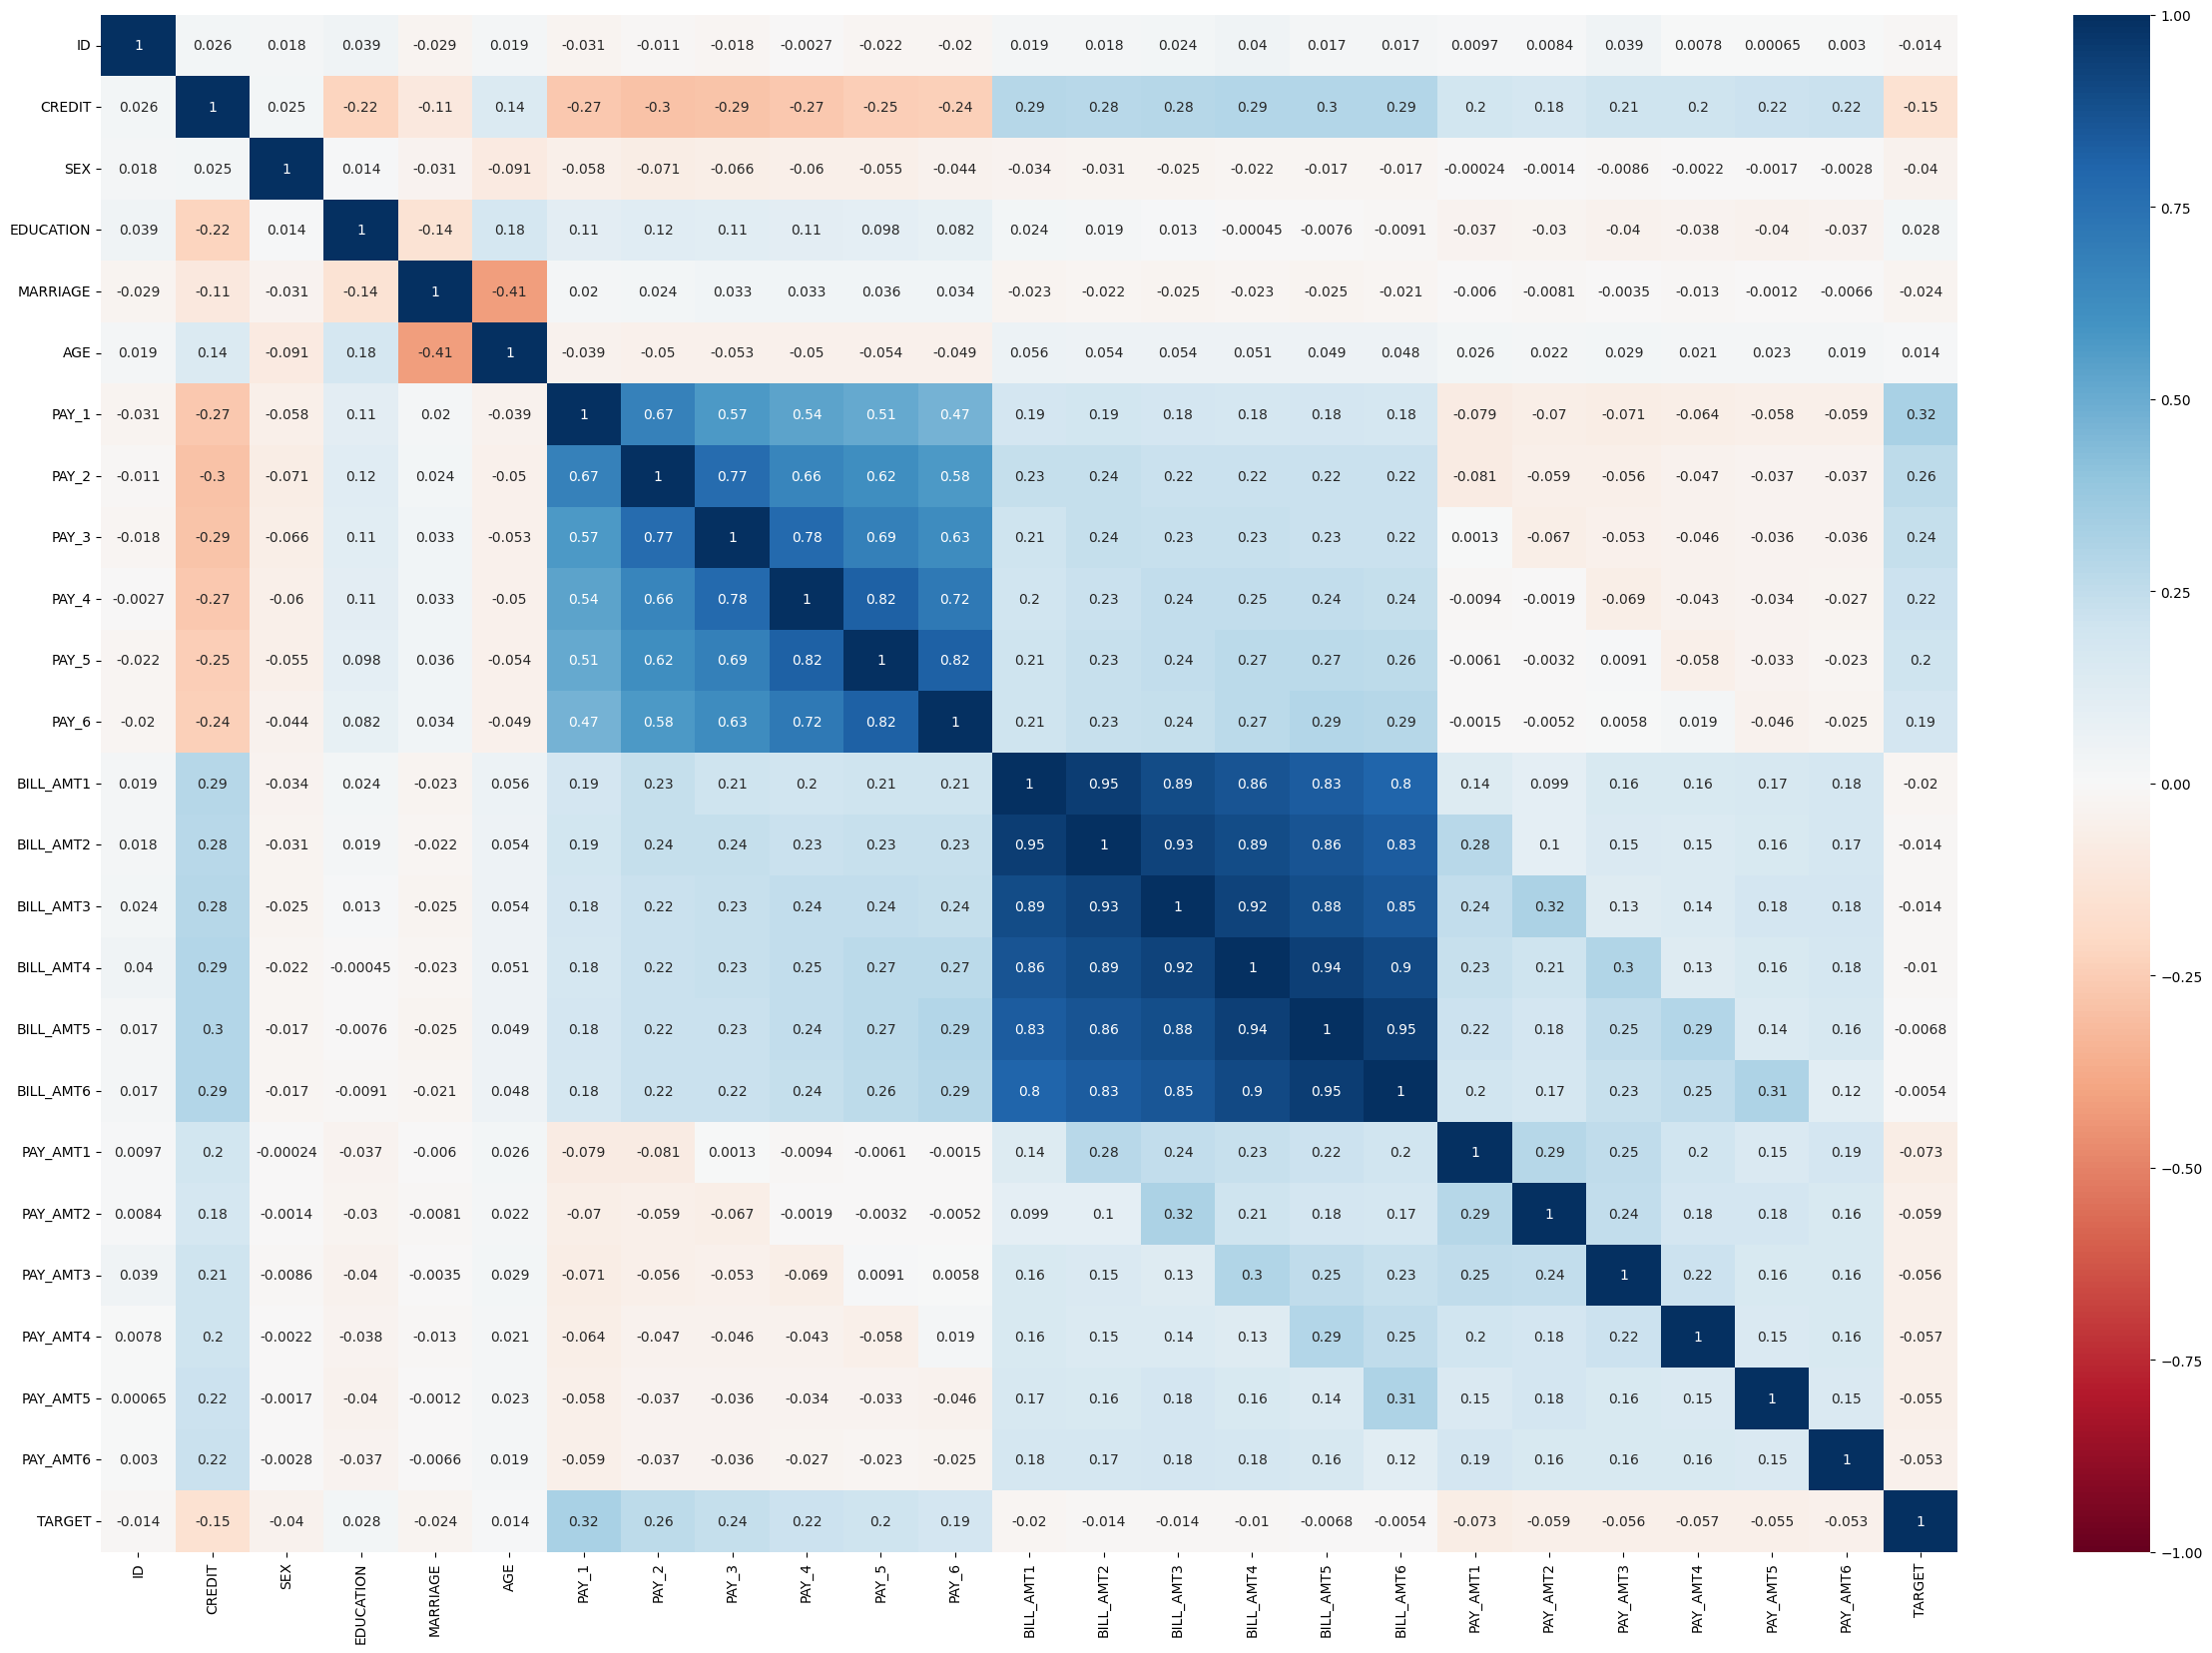

In [104]:
# Correlation of the features

# Set plot
plt.subplots(figsize=(30,20))

#Create heat map with values
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)

The correlation that we see between the bill amount and payment activity is likely due to spending and payment habits . We can possibly consider comparing the training a model with only the average payment and spending of the last six months.

Furthermore, we can see some indication that the history of payment (PAY_1, PAY_2, etc.) might have a strong weight in the classification. This makes sense, since we expect that historic behavior in payment will impact the likelihood of a person defaulting payment in a near future (in fact, the most recent payment is the most correlatec feature to the target classification).

<Axes: xlabel='BILL_AMT6', ylabel='PAY_AMT6'>

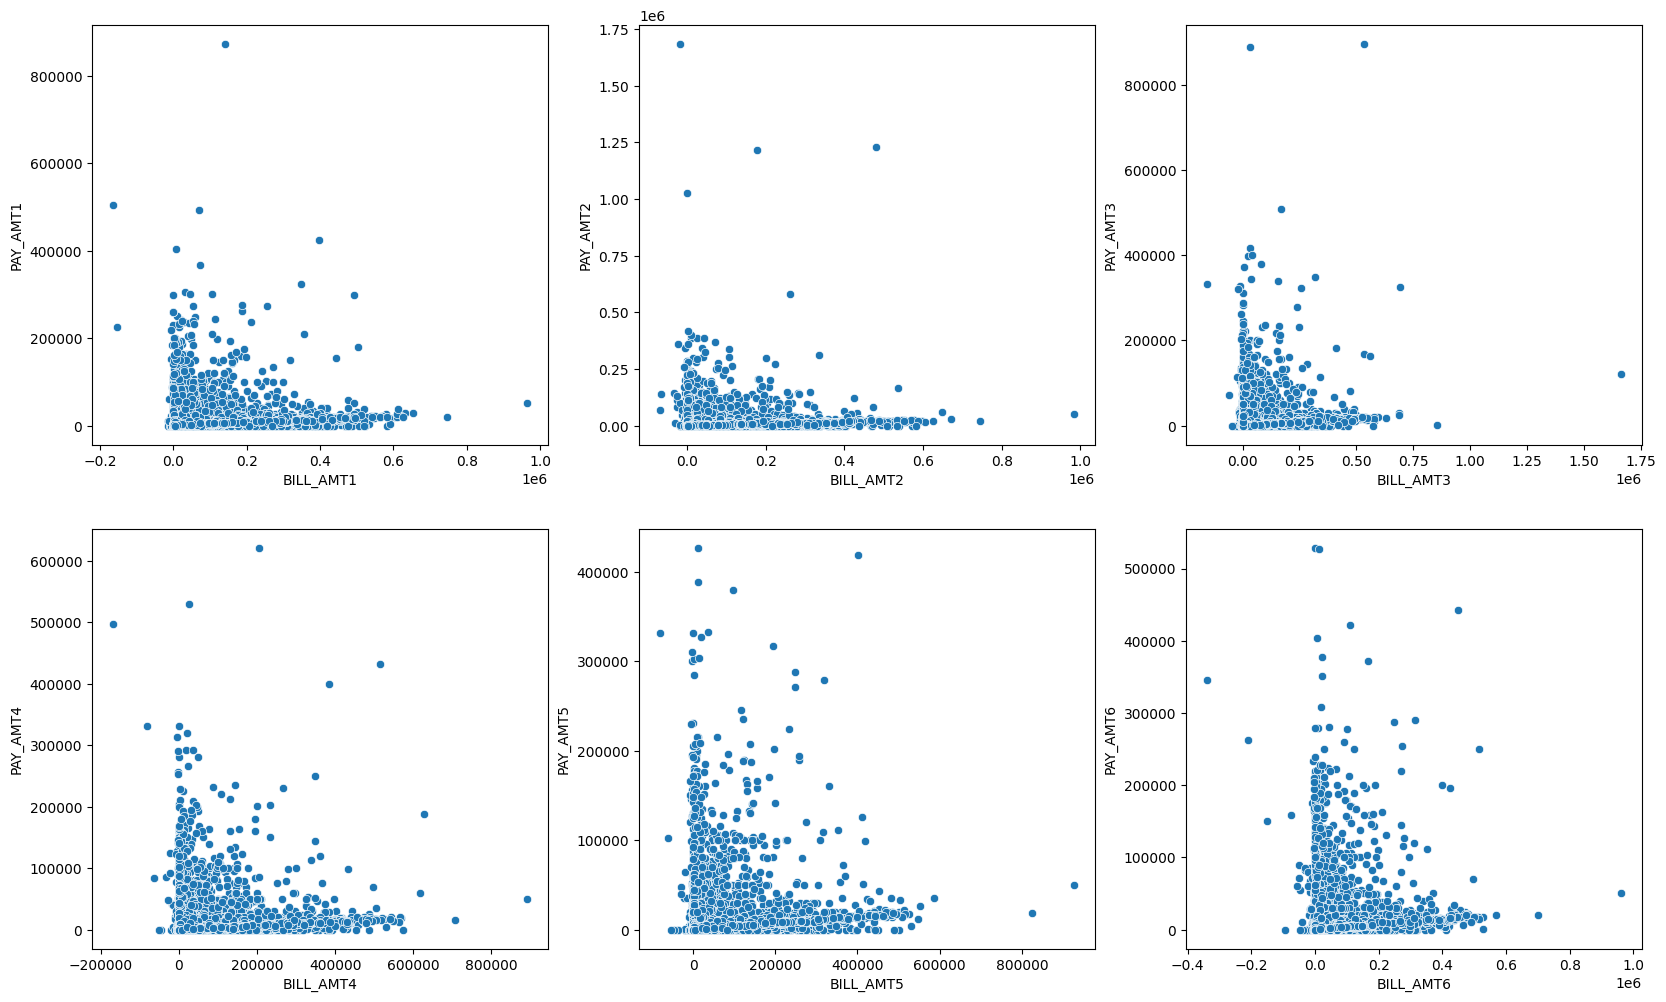

In [109]:
# Set up figure and subplots
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(20,12), dpi=100)

sns.scatterplot(data=dataset, x='BILL_AMT1', y='PAY_AMT1', ax=axs[0,0])
sns.scatterplot(data=dataset, x='BILL_AMT2', y='PAY_AMT2', ax=axs[0,1])
sns.scatterplot(data=dataset, x='BILL_AMT3', y='PAY_AMT3', ax=axs[0,2])
sns.scatterplot(data=dataset, x='BILL_AMT4', y='PAY_AMT4', ax=axs[1,0])
sns.scatterplot(data=dataset, x='BILL_AMT5', y='PAY_AMT5', ax=axs[1,1])
sns.scatterplot(data=dataset, x='BILL_AMT6', y='PAY_AMT6', ax=axs[1,2])


We can see that there are two main features:
* A distribution of people that pay close to 0 among all sizes of the bill
* And those that can pay more than their bill (possibly due to other late payments)

Let's include a new version of the data set that has the following:
* PAY_DEFAULT = BILL_AMT - PAY_AMT
* Average PAY_AMT
* Average BILL_AMT

In [113]:
# Define new DataFrame
df = dataset.copy()

#Calculate the default value in last 6 months
df['PAY_DEFAULT1'] = df['BILL_AMT1']-df['PAY_AMT1']
df['PAY_DEFAULT2'] = df['BILL_AMT2']-df['PAY_AMT2']
df['PAY_DEFAULT3'] = df['BILL_AMT3']-df['PAY_AMT3']
df['PAY_DEFAULT4'] = df['BILL_AMT4']-df['PAY_AMT4']
df['PAY_DEFAULT5'] = df['BILL_AMT5']-df['PAY_AMT5']
df['PAY_DEFAULT6'] = df['BILL_AMT6']-df['PAY_AMT6']

# Calculate the average of payment, bill, and default in last 6 months
df['AVG_PAY'] = (df['PAY_AMT1']+df['PAY_AMT2']+df['PAY_AMT3']+df['PAY_AMT4']+df['PAY_AMT5']+df['PAY_AMT6'])/6
df['AVG_BILL'] = (df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6'])/6
df['AVG_DEFAULT'] = (df['PAY_DEFAULT1']+df['PAY_DEFAULT2']+df['PAY_DEFAULT3']+df['PAY_DEFAULT4']+df['PAY_DEFAULT5']+df['PAY_DEFAULT6'])/6

df.head()


,ID,CREDIT,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,TARGET,PAY_DEFAULT1,PAY_DEFAULT2,PAY_DEFAULT3,PAY_DEFAULT4,PAY_DEFAULT5,PAY_DEFAULT6,AVG_PAY,AVG_BILL,AVG_DEFAULT
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,1,3913.0,2413.0,689.0,0.0,0.0,0.0,114.833333,1284.000000,1169.166667
1,2,120000.0,2,2,2,26,-1,2,0,0,...,1,2682.0,725.0,1682.0,2272.0,3455.0,1261.0,833.333333,2846.166667,2012.833333
2,3,90000.0,2,2,2,34,0,0,0,0,...,0,27721.0,12527.0,12559.0,13331.0,13948.0,10549.0,1836.333333,16942.166667,15105.833333
3,4,50000.0,2,2,1,37,0,0,0,0,...,0,44990.0,46214.0,48091.0,27214.0,27890.0,28547.0,1398.000000,38555.666667,37157.666667
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,0,6617.0,-31011.0,25835.0,11940.0,18457.0,18452.0,9841.500000,18223.166667,8381.666667


<Axes: >

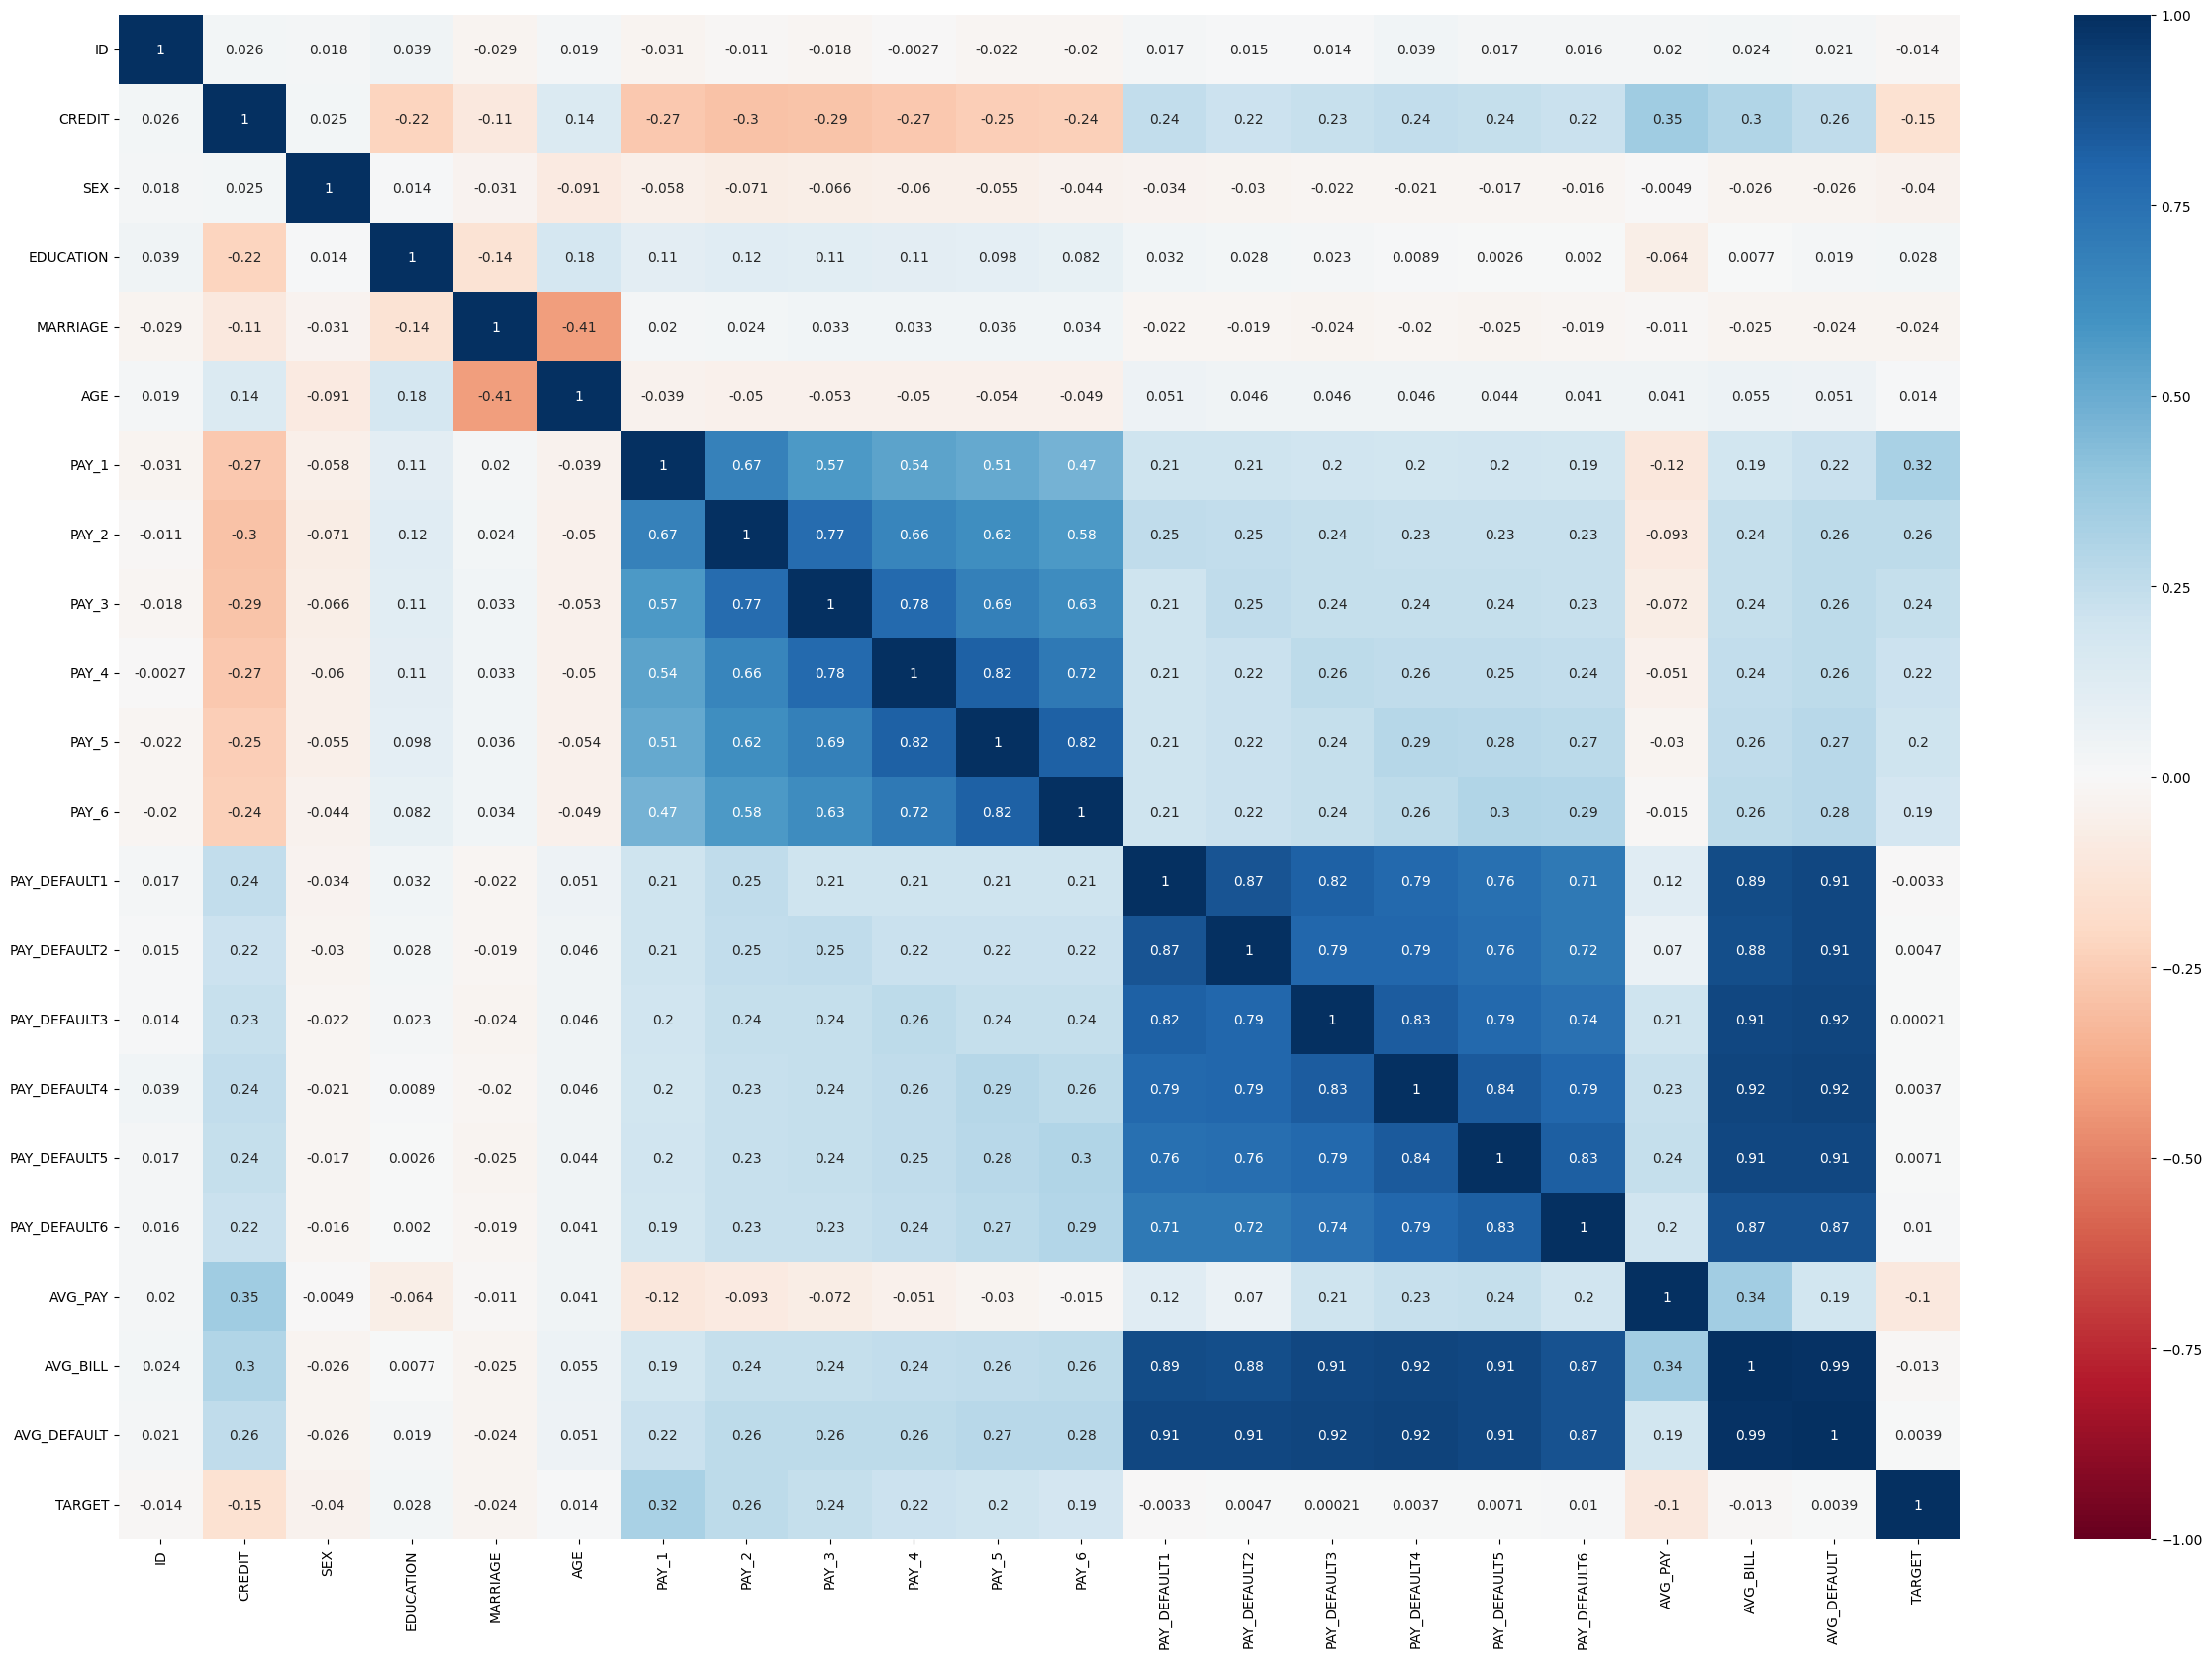

In [115]:
# Update the dataframe

update_columns = ['ID', 'CREDIT', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','PAY_DEFAULT1', 'PAY_DEFAULT2', 'PAY_DEFAULT3', 'PAY_DEFAULT4',
       'PAY_DEFAULT5', 'PAY_DEFAULT6', 'AVG_PAY', 'AVG_BILL', 'AVG_DEFAULT', 'TARGET']

#Create new data frame
df_update = df[update_columns]

# Correlation of the features

# Set plot
plt.subplots(figsize=(30,20))

#Create heat map with values
sns.heatmap(df_update.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)


During training, we would compare how the performance is for two views:
* With the average values instead of the month by month default payments
* with the month by month default payments and not the averages

We would then compare the most important attributes for each model and how it compares to the pay status attributes (PAY_1, PAY_2, etc.)

<Axes: xlabel='EDUCATION', ylabel='AVG_DEFAULT'>

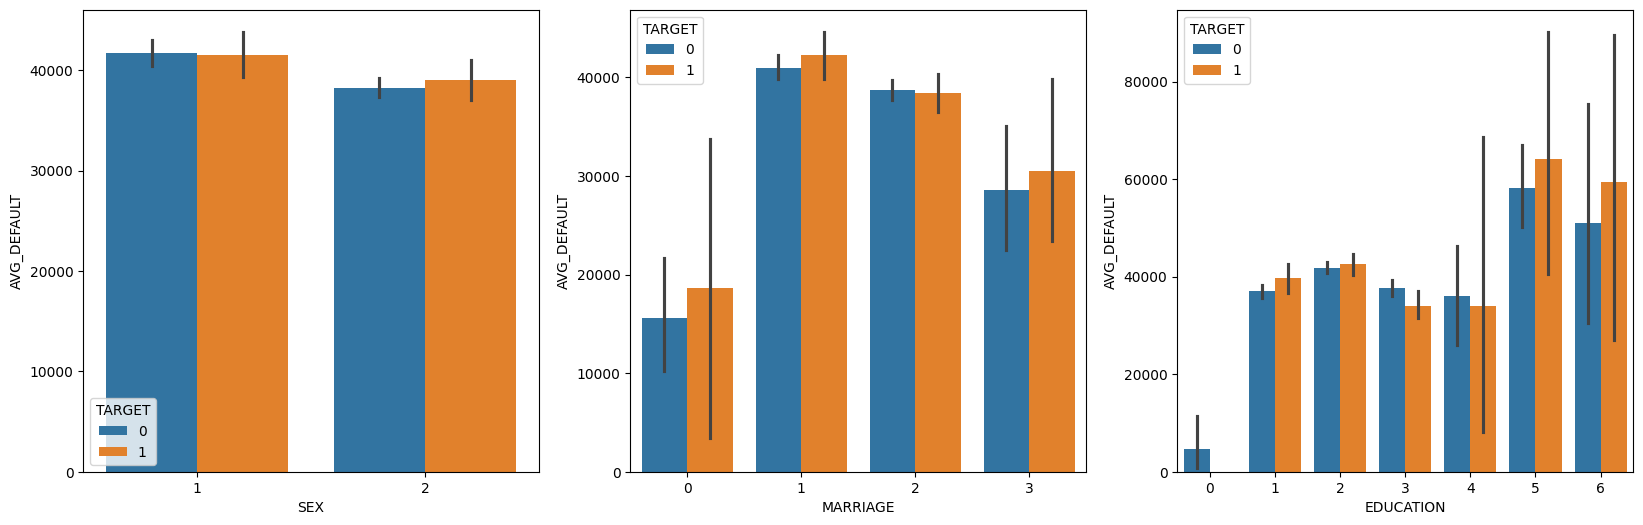

In [122]:
# Comparing to the categorical variables to the average default and target class
# Set up figure and subplots
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(20,6), dpi=100)

sns.barplot(data=df_update, x='SEX', y='AVG_DEFAULT', ax=axs[0], hue = 'TARGET', palette='tab10')
sns.barplot(data=df_update, x='MARRIAGE', y='AVG_DEFAULT', ax=axs[1], hue = 'TARGET', palette='tab10')
sns.barplot(data=df_update, x='EDUCATION', y='AVG_DEFAULT', ax=axs[2], hue = 'TARGET', palette='tab10')


Based on these distributions, the average amount of default does not look to be very decisive in determining the likelihood of a next default.

##2.2) Pre-Processing

Now that we have a better understanding of the features we have and have performed some analysis to identify witch could be the most important to keep in training, let's perform some pre processing to output the data set that will be used in the modeling

### Encoding

Let's perform the one-hot encoding to tag the following:
* MARRIAGE: married=1, not married=0
* EDUCATION: higher education = 1, non higher education = 0

(Note that we are not considering the gender here, since it is already in a sort of binary form (1 or 2)).

In [138]:
df_processing= df_update.copy() # making a copy of our current dataframe

# Mapping the Marriage variable - note that we use this way instead of the encoder method, but the result is the same. This way was chosen due to the simplicity and easy visualization of the changes.
mapping_dicMarriage={0:0,1:1,2:0,3:0}
df_processing['isMarried'] = df_processing['MARRIAGE'].map(mapping_dicMarriage)

# Mapping the Education variable
mapping_dicEducation={0:0,1:1,2:1,3:0,4:0,5:0,6:0}
df_processing['isHigherDegree'] = df_processing['EDUCATION'].map(mapping_dicEducation)

df_processing = df_processing.drop('MARRIAGE', axis=1)
df_processing = df_processing.drop('EDUCATION', axis=1)

df_processing.head()

,ID,CREDIT,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_DEFAULT3,PAY_DEFAULT4,PAY_DEFAULT5,PAY_DEFAULT6,AVG_PAY,AVG_BILL,AVG_DEFAULT,TARGET,isMarried,isHigherDegree
0,1,20000.0,2,24,2,2,-1,-1,-2,-2,...,689.0,0.0,0.0,0.0,114.833333,1284.000000,1169.166667,1,1,1
1,2,120000.0,2,26,-1,2,0,0,0,2,...,1682.0,2272.0,3455.0,1261.0,833.333333,2846.166667,2012.833333,1,0,1
2,3,90000.0,2,34,0,0,0,0,0,0,...,12559.0,13331.0,13948.0,10549.0,1836.333333,16942.166667,15105.833333,0,0,1
3,4,50000.0,2,37,0,0,0,0,0,0,...,48091.0,27214.0,27890.0,28547.0,1398.000000,38555.666667,37157.666667,0,1,1
4,5,50000.0,1,57,-1,0,-1,0,0,0,...,25835.0,11940.0,18457.0,18452.0,9841.500000,18223.166667,8381.666667,0,1,1


### Selecting features
Now let's remove the variables that will not be necessary.

In [131]:
# Removing the average values of the  correlated to the default amounts.
df_processing = df_processing.drop('AVG_PAY', axis=1)
df_processing = df_processing.drop('AVG_BILL', axis=1)
df_processing = df_processing.drop('AVG_DEFAULT', axis=1)

# Removing the ID
df_processing = df_processing.drop('ID', axis=1)

### Scaling

Finally, given the discrepency between the range of the numerical features, let's scale some of the features.

Given the analyses we performed above, we will normalize and standardize the distributions to diminish the impact of the outliers in the training.

We will save the two copies and test the training accordinly.

First, let's separate the attributes from the target class.

In [133]:
#Separating attributes from target
df_features = df_processing.drop('TARGET',axis=1)
df_target = df_processing['TARGET']

Now let's apply the fit transform for each of them.

In [135]:
rescaled_features_std = StandardScaler().fit_transform(df_features)
rescaled_features_MinMax = MinMaxScaler().fit_transform(df_features)

In [137]:
# Showing data transformed
print("Standardization: \n", rescaled_features_std)

print("\nNormalization: \n", rescaled_features_MinMax)

Standardization: 
 [[-1.13672015  0.81016074 -1.24601985 ... -0.5595361   1.09377971
   0.46772753]
 [-0.3659805   0.81016074 -1.02904717 ... -0.53857195 -0.91426088
   0.46772753]
 [-0.59720239  0.81016074 -0.16115646 ... -0.38415872 -0.91426088
   0.46772753]
 ...
 [-1.05964618 -1.23432296  0.16430256 ... -0.28926308 -0.91426088
   0.46772753]
 [-0.67427636 -1.23432296  0.59824792 ...  0.22416754  1.09377971
  -2.13799688]
 [-0.90549825 -1.23432296  1.14067961 ... -0.32158213  1.09377971
   0.46772753]]

Normalization: 
 [[0.01010101 1.         0.05172414 ... 0.42905111 1.         1.        ]
 [0.11111111 1.         0.0862069  ... 0.42984106 0.         1.        ]
 [0.08080808 1.         0.22413793 ... 0.4356595  0.         1.        ]
 ...
 [0.02020202 0.         0.27586207 ... 0.43923526 0.         1.        ]
 [0.07070707 0.         0.34482759 ... 0.45858182 1.         0.        ]
 [0.04040404 0.         0.43103448 ... 0.43801745 1.         1.        ]]


#3) Conclusion

In this MVP we work with a data set from UCI Machine Learning Repository. The banking credit data set is interesting because it has a mix of numerical and categorical variables that require different types of treatment and considerations regarding which information is pertinent to keep.

In the exploratiry data analysis, we were able to observe how some of the features are clearly to be kept during the modeling, due to the impact it can have in the target classification.

We also observed that the target classes are not balanced, and in fact we only have 22% of the data set in the class of "Default" (1). This will require further considerations when dividing the data set between training and test.

Finally, we perfomed the necessary transformations to ensure a certain level of standardization of the dataset, since the distributions can be very different, including the presence of long tails in the distributions.

The next step would be to divide the data set in training and testing (considering the balancing needed) and then testing a range of classification models and ensembles.